# Importing Libraries, Loading Data

In [186]:
# reference - https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 5

In [2]:
data = pd.read_csv('AirPassengers.csv')

In [3]:
print data.head()
print '-'*50

print '\nShape'
print data.shape
print '-'*50

print '\nData Types'
print data.dtypes
print '-'*50

print '\nIndex'
print data.index

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
--------------------------------------------------

Shape
(144, 2)
--------------------------------------------------

Data Types
Month          object
#Passengers     int64
dtype: object
--------------------------------------------------

Index
RangeIndex(start=0, stop=144, step=1)


In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
ts_data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [5]:
print ts_data.head()
print '-'*50

print '\nShape'
print ts_data.shape
print '-'*50

print '\nData Types'
print ts_data.dtypes
print '-'*50

print '\nIndex'
print ts_data.index

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
--------------------------------------------------

Shape
(144, 1)
--------------------------------------------------

Data Types
#Passengers    int64
dtype: object
--------------------------------------------------

Index
DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=144, freq=None)


In [6]:
print 'type of ts_data:', type(ts_data)

type of ts_data: <class 'pandas.core.frame.DataFrame'>


In [7]:
# converting data frame to series
ts = ts_data['#Passengers']
print 'type of ts:', type(ts)

type of ts: <class 'pandas.core.series.Series'>


In [8]:
print 'Monthly Records - 1949'
print ts['1949']

Monthly Records - 1949
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64


In [9]:
print 'Monthly Records - 1949 to 1950'
print ts['1949' : '1950']

Monthly Records - 1949 to 1950
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64


In [10]:
print 'Monthly Records - 1949 April to 1950 March'
print ts['1949-04-01' : '1950-03-01']

Monthly Records - 1949 April to 1950 March
Month
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
Name: #Passengers, dtype: int64


# Stationarity Check

## Stationarity Criteria

    A Stationary Time Series follows the following three conditions:

     - Constant Mean.
     - Constant Variance.
     - Autocovariance independent to time.

## Visualization - Time Plot

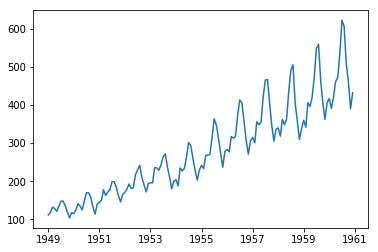

In [11]:
plt.plot(ts)

Inferences from the time plot:
 - This time series is **non-stationary**.
 - It has an **increasing trend**.
 - It seems to be **seasonal**, monthly.

## Visualization - Rolling Mean, Rolling Std

In [12]:
def rolling_stats_test(timeseries):
    # determing rolling statistics
    
    # deprecated methods! old way of computing.
    # rolmean = pd.rolling_mean(timeseries, window=12)
    # rolstd = pd.rolling_std(timeseries, window=12)
    
    # converting pandas series to dataframe
    # ts_df = pd.DataFrame({'Month': timeseries.index, 'Passengers': timeseries.values})
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # plot rolling statistics
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

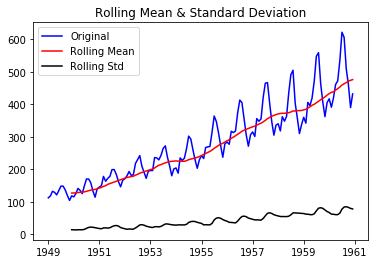

In [13]:
rolling_stats_test(ts)

## Dickey Fuller Test

In [14]:
from statsmodels.tsa.stattools import adfuller
def dickey_fuller_test(timeseries):
    print 'Results of Dickey-Fuller Test'
    print '-'*50
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(
        dftest[0:4],
        index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [15]:
dickey_fuller_test(ts)

Results of Dickey-Fuller Test
--------------------------------------------------
Test Statistic                   0.815369
p-value                          0.991880
Number of Lags Used             13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


# Non-Stationary to Stationary

## Estimating, Eliminating the Trend

### Reducing the Trend

Transformations can be used to reduce the trend. Like,
   - Power Transformations
       - Cube Root
       - Square Root
   - Log Transformation
   - Box-Cox Transformation

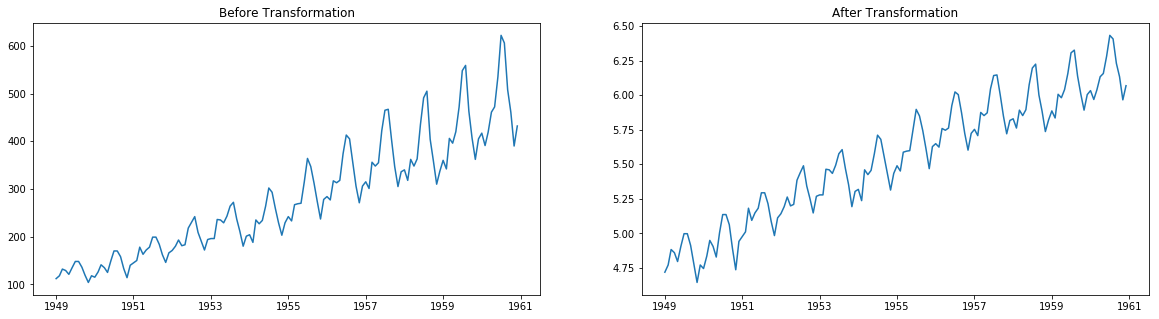

In [31]:
# log transformation
ts_log = np.log(ts)

# before transformation
plt.subplot(121)
plt.title('Before Transformation')
plt.plot(ts)

# after transformation
plt.subplot(122)
plt.title('After Transformation')
plt.plot(ts_log)

    It is evident that log transform has penalized the postive exterme values,
    which has reduced the increasing trend. Yet, the trend appears to remain there in the series.

### Moving Average

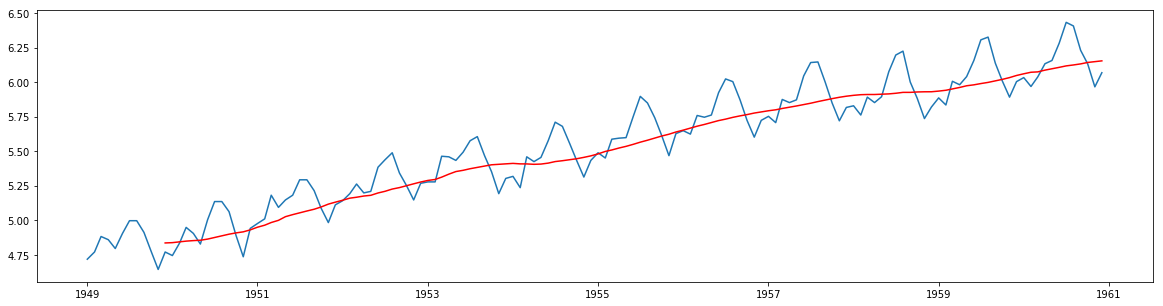

In [29]:
moving_avg = ts_log.rolling(window=12).mean()

plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [33]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64

In [53]:
# dropping the NaN values
ts_log_moving_avg_diff.dropna(inplace=True)

# adjusting the plot params
rcParams['figure.figsize'] = 20, 3

Rolling Stats for Original Time Series


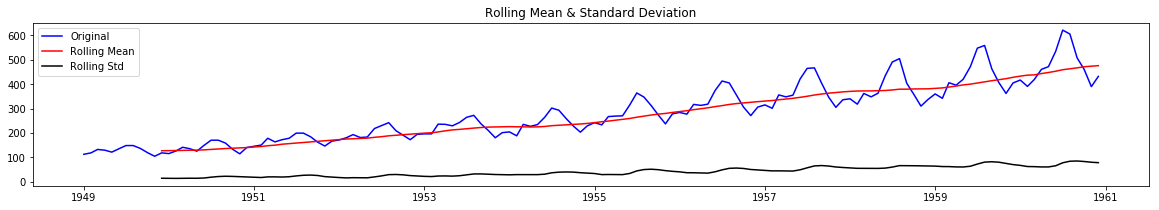

Rolling Stats for Log Transformed Time Series


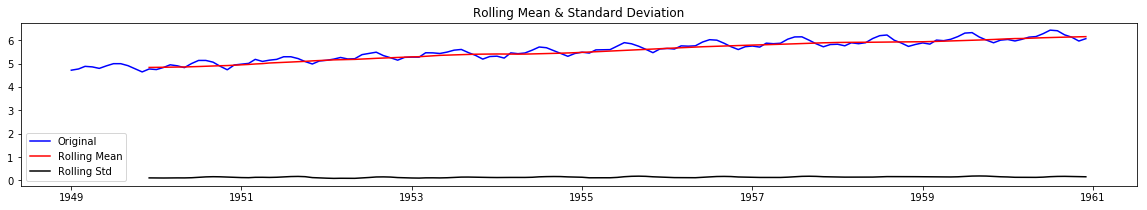

Rolling Stats for Moving Average Log Transformed Time Series


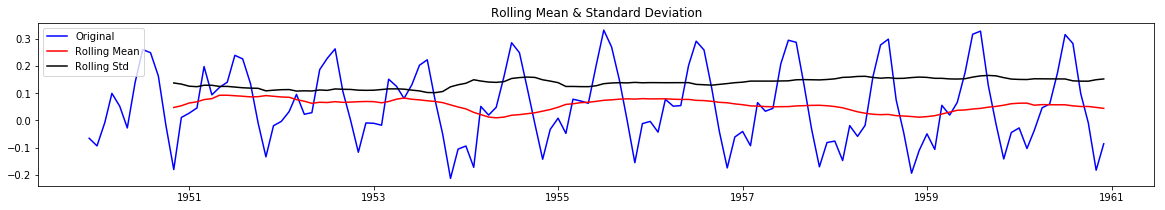

In [54]:
print 'Rolling Stats for Original Time Series'
rolling_stats_test(ts)

print 'Rolling Stats for Log Transformed Time Series'
rolling_stats_test(ts_log)

print 'Rolling Stats for Moving Average Log Transformed Time Series'
rolling_stats_test(ts_log_moving_avg_diff)

In [56]:
print '\nOriginal Time Series'
dickey_fuller_test(ts)

print '\nLog Transformed Time Series'
dickey_fuller_test(ts_log)

print '\nMoving Average Log Transformed Time Series'
dickey_fuller_test(ts_log_moving_avg_diff)


Original Time Series
Results of Dickey-Fuller Test
--------------------------------------------------
Test Statistic                   0.815369
p-value                          0.991880
Number of Lags Used             13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64

Log Transformed Time Series
Results of Dickey-Fuller Test
--------------------------------------------------
Test Statistic                  -1.717017
p-value                          0.422367
Number of Lags Used             13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64

Moving Average Log Transformed Time Series
Results of Dickey-Fuller Test
--------------------------------------------------
Test Statistic                  -3.162908
p-

### Exponentially Weighted Moving Average

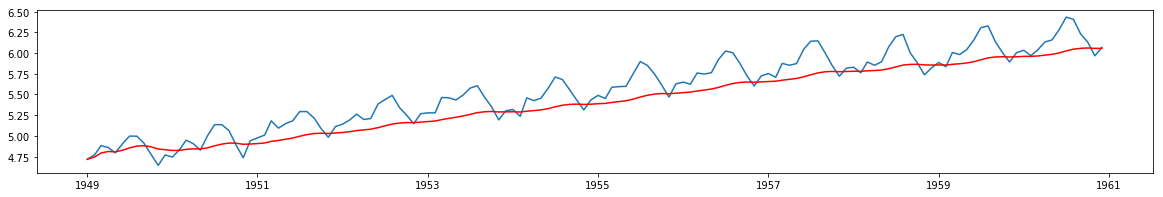

In [67]:
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [69]:
ts_log_ewma_diff = ts_log - expwighted_avg

Rolling Stats for Exponentially Weighted Moving Average Log Transformed Time Series


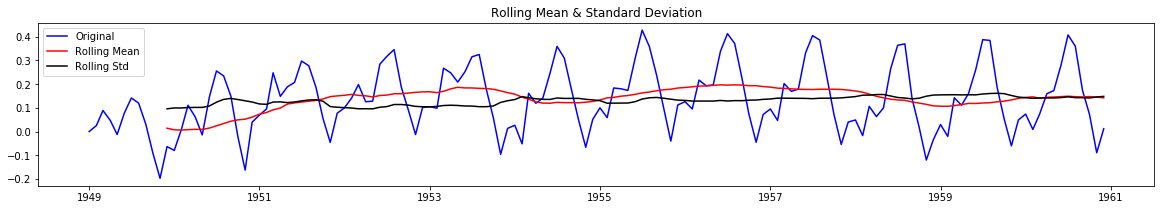

In [71]:
print 'Rolling Stats for Exponentially Weighted Moving Average Log Transformed Time Series'
rolling_stats_test(ts_log_ewma_diff)

In [72]:
print '\nExponentially Weighted Moving Average Log Transformed Time Series'
dickey_fuller_test(ts_log_ewma_diff)


Exponentially Weighted Moving Average Log Transformed Time Series
Results of Dickey-Fuller Test
--------------------------------------------------
Test Statistic                  -3.601262
p-value                          0.005737
Number of Lags Used             13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


## Eliminating Trend and Seasonality

### Differencing

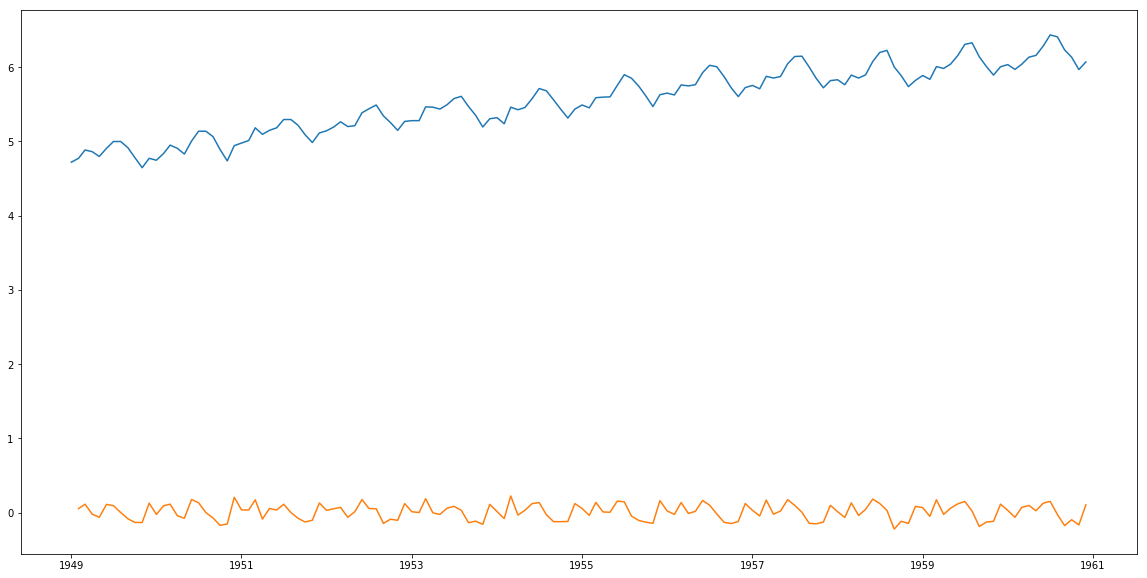

In [84]:
ts_log_diff = ts_log - ts_log.shift()

# adjusting the plot params
rcParams['figure.figsize'] = 20, 10

plt.plot(ts_log)
plt.plot(ts_log_diff)


Differenced, Log Transformed Time Series


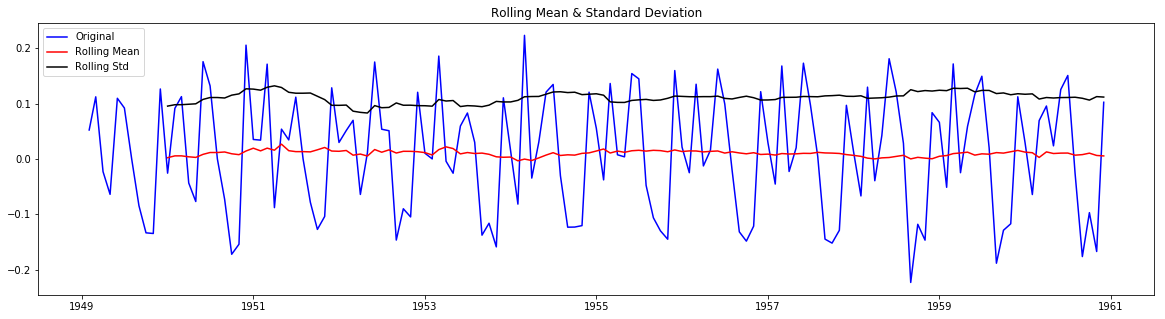

In [101]:
# adjusting the plot params
rcParams['figure.figsize'] = 20, 5

print '\nDifferenced of the Log Transformed Time Series'
rolling_stats_test(ts_log_diff)

In [92]:
print '\nDifferencing of the Log Transformed Time Series'
dickey_fuller_test(ts_log_diff)


Differenced, Log Transformed Time Series
Results of Dickey-Fuller Test
--------------------------------------------------
Test Statistic                  -2.717131
p-value                          0.071121
Number of Lags Used             14.000000
Number of Observations Used    128.000000
Critical Value (5%)             -2.884398
Critical Value (1%)             -3.482501
Critical Value (10%)            -2.578960
dtype: float64


### Decomposition

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

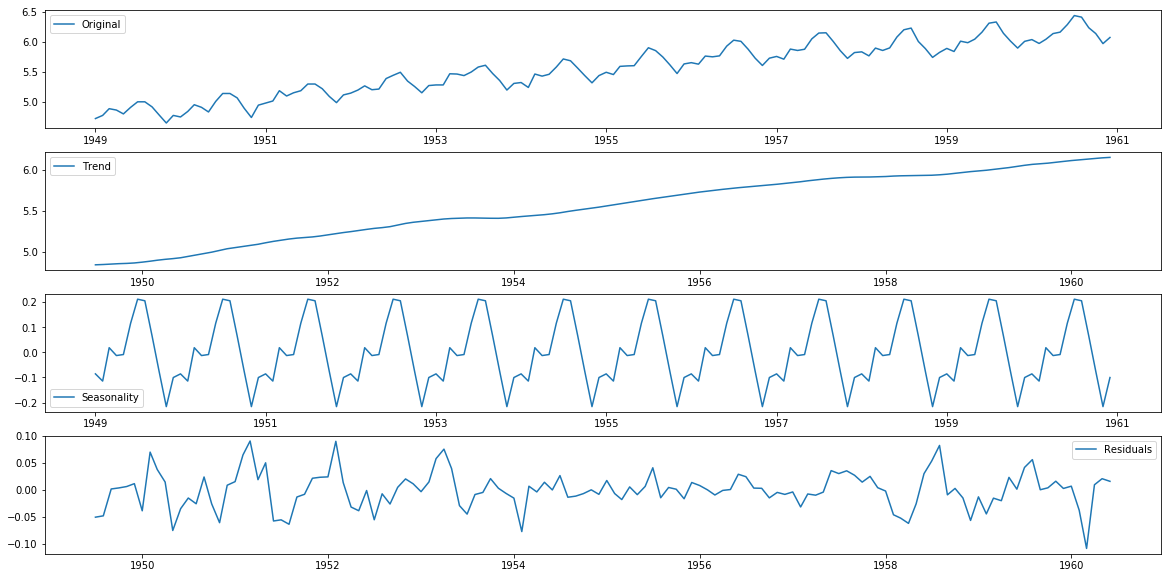

In [98]:
# adjusting the plot params
rcParams['figure.figsize'] = 20, 10

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')


Decomposed Residual of the Log Transformed Time Series


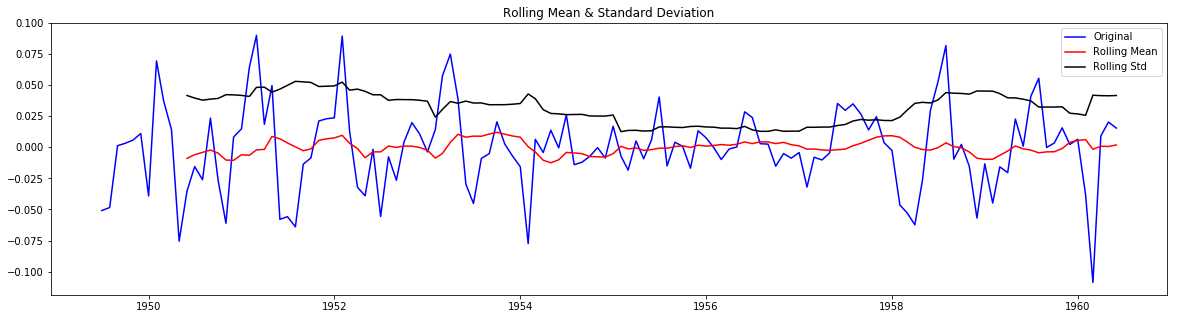

In [104]:
# adjusting the plot params
rcParams['figure.figsize'] = 20, 5

print '\nDecomposed Residual of the Log Transformed Time Series'
rolling_stats_test(residual)

In [105]:
print '\nDecomposed Residual of the Log Transformed Time Series'
dickey_fuller_test(residual)


Decomposed Residual of the Log Transformed Time Series
Results of Dickey-Fuller Test
--------------------------------------------------
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
Number of Lags Used            9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (5%)           -2.885538e+00
Critical Value (1%)           -3.485122e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


# Time Series Forecasting

## ACF, PACF

In [150]:
from statsmodels.tsa.stattools import acf, pacf

In [162]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Partial Auto Correlation Function')

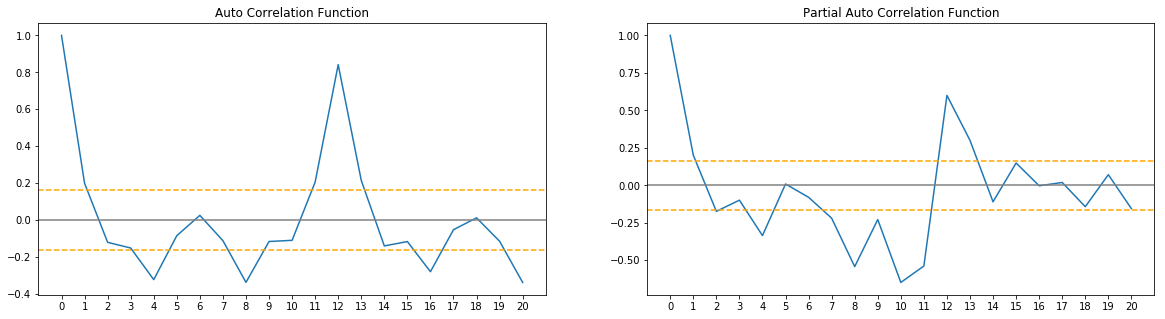

In [164]:
upper_limit = 1.96/np.sqrt(len(ts_log_diff))
lower_limit = -upper_limit

# ACF Plot 
plt.subplot(121) 
plt.plot(lag_acf)
plt.xticks(np.arange(0, 21, 1.0))
plt.axhline(y=0, linestyle='-', color='gray')
plt.axhline(y=upper_limit, linestyle='--', color='orange')
plt.axhline(y=lower_limit, linestyle='--', color='orange')
plt.title('Auto Correlation Function')

# PACF Plot
plt.subplot(122)
plt.plot(lag_pacf)
plt.xticks(np.arange(0, 21, 1.0))
plt.axhline(y=0, linestyle='-', color='gray')
plt.axhline(y=upper_limit, linestyle='--', color='orange')
plt.axhline(y=lower_limit, linestyle='--', color='orange')
plt.title('Partial Auto Correlation Function')

In [155]:
# source - https://stackoverflow.com/a/27558293/3086097
# from statsmodels.graphics import tsaplots
# tsaplots.plot_acf(ts_log_diff)

## AR Model

In [165]:
from statsmodels.tsa.arima_model import ARIMA

/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.5023')

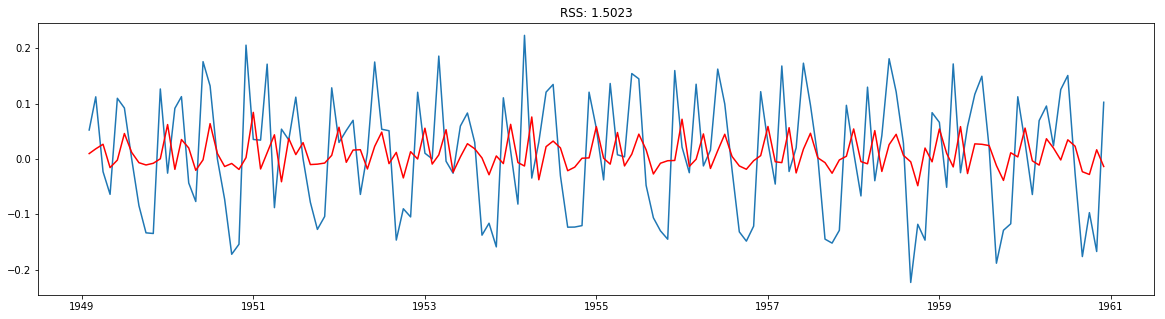

In [170]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - ts_log_diff)**2))

## MA Model

/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.4721')

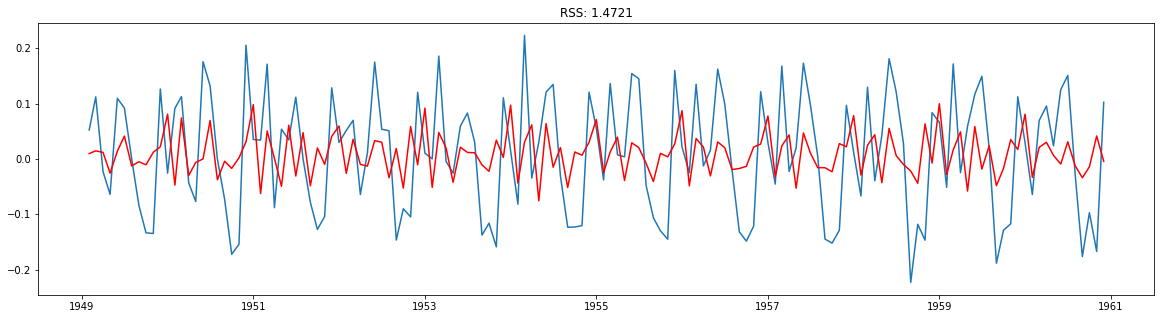

In [171]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - ts_log_diff)**2))

## ARIMA Model

/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.0292')

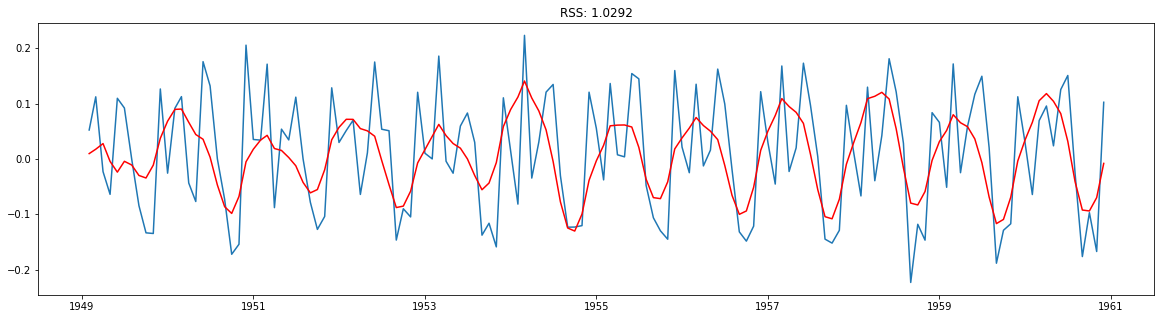

In [174]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - ts_log_diff)**2))

## Forecast

In [176]:
# differenced values estimated by ARIMA
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [179]:
# reversing the differencing by cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [185]:
# adding the base number which is missed in the differencing process
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5,1,'RMSE: 90.1045')

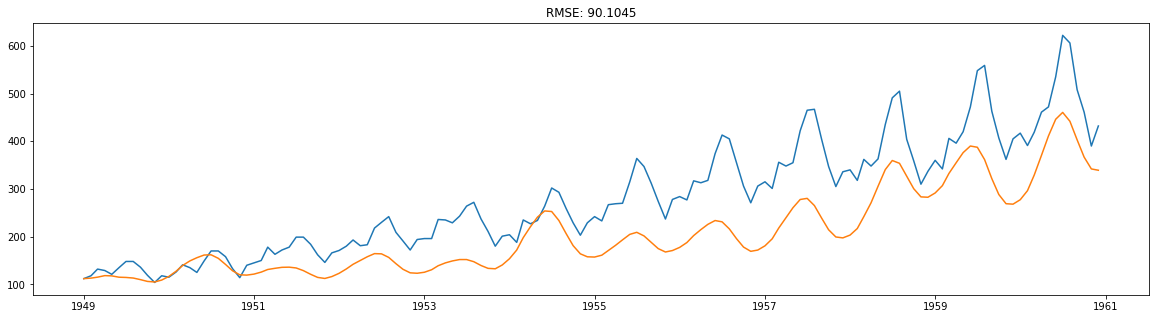

In [183]:
# reverting the log transform done to the series
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))